# Who uses the most tacticals in the CDL?

This workbook contains analysis on which player uses the most tacticals in the CDL, and on what map.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt

from cdl_helper import read_in_all_matches

df = read_in_all_matches()
df.sample(5)

[5 rows x 97 columns]

In [2]:
df['tacticalsUsed']

0     10.0
1     15.0
2      7.0
3      7.0
4     10.0
      ... 
35     2.0
36     6.0
37     4.0
38     5.0
39     5.0
Name: tacticalsUsed, Length: 3272, dtype: float64

In [3]:
df['lethalsUsed']

0     10.0
1     13.0
2     11.0
3      9.0
4      8.0
      ... 
35     5.0
36     4.0
37     1.0
38     6.0
39     2.0
Name: lethalsUsed, Length: 3272, dtype: float64

In [4]:
df['equiptment_used'] = df['tacticalsUsed'] + df['lethalsUsed']
df['equiptment_used']

0     20.0
1     28.0
2     18.0
3     16.0
4     18.0
      ... 
35     7.0
36    10.0
37     5.0
38    11.0
39     7.0
Name: equiptment_used, Length: 3272, dtype: float64

In [5]:
df = df[df['gameMode'] != 'CDL SnD']
df['gameMode'].unique()

array(['CDL Hardpoint', 'CDL Control'], dtype=object)

In [6]:
sorted_df = df.sort_values(by='equiptment_used', ascending=False)
sorted_df.reset_index().iloc[0:10]

,index,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,...,matchGame.gameMap.publishDetails.user,matchGameResult.hostGameScore,matchGameResult.guestGameScore,matchGameResult.winnerTeamId,matchGameResult.loserTeamId,event,setting,totalHeadshots,totalTiersCaptured,equiptment_used
0,21,Al Bagra Fortress,CDL Control,111,2,Dylan,Hannon,Envoy,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,2.0,3.0,69.0,138.0,M2Qual,online,NaN,NaN,56.0
1,21,Breenbergh Hotel,CDL Control,111,2,Dylan,Hannon,Envoy,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,3.0,2.0,15.0,69.0,M3Qual,online,NaN,NaN,55.0
2,16,Breenbergh Hotel,CDL Control,44,2,Obaid,Asim,Asim,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,2.0,3.0,17.0,10.0,M2Qual,online,NaN,NaN,54.0
3,20,Al Bagra Fortress,CDL Control,111,2,Dylan,Hannon,Envoy,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,3.0,2.0,69.0,6.0,M2Event,lan,NaN,NaN,54.0
4,17,Breenbergh Hotel,CDL Control,39,2,Preston,Greiner,Priestahh,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,3.0,2.0,69.0,13.0,M2Event,lan,NaN,NaN,54.0
5,16,Al Bagra Fortress,CDL Control,44,2,Obaid,Asim,Asim,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,2.0,3.0,12.0,10.0,M2Qual,online,NaN,NaN,54.0
6,19,Al Bagra Fortress,CDL Control,112,2,Alec,Sanderson,Arcitys,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,2.0,3.0,11.0,15.0,M3Qual,online,NaN,NaN,53.0
7,0,Mercado Las Almas,CDL Hardpoint,44,2,Obaid,Asim,Asim,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,166.0,250.0,17.0,10.0,M2Qual,online,NaN,NaN,53.0
8,1,Zarqwa Hydroelectric,CDL Hardpoint,54,2,Anthony,Zinni,Methodz,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,250.0,248.0,6.0,138.0,M2Event,lan,NaN,NaN,53.0
9,1,Embassy,CDL Hardpoint,39,2,Preston,Greiner,Priestahh,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",...,blte5475d8d4c1a4efe,199.0,250.0,13.0,6.0,M3Qual,online,NaN,NaN,52.0


I now need to create a suitable map description for the x axis


In [7]:
sorted_df['fullDescription'] = [f"{player} vs {op} \n{ev} \n{map_}\n{mode}" for player, op, map_, mode, ev in zip(sorted_df['alias'], sorted_df['oppo_abbrev'], sorted_df['gameMap'], sorted_df['gameMode'], sorted_df['event'])]

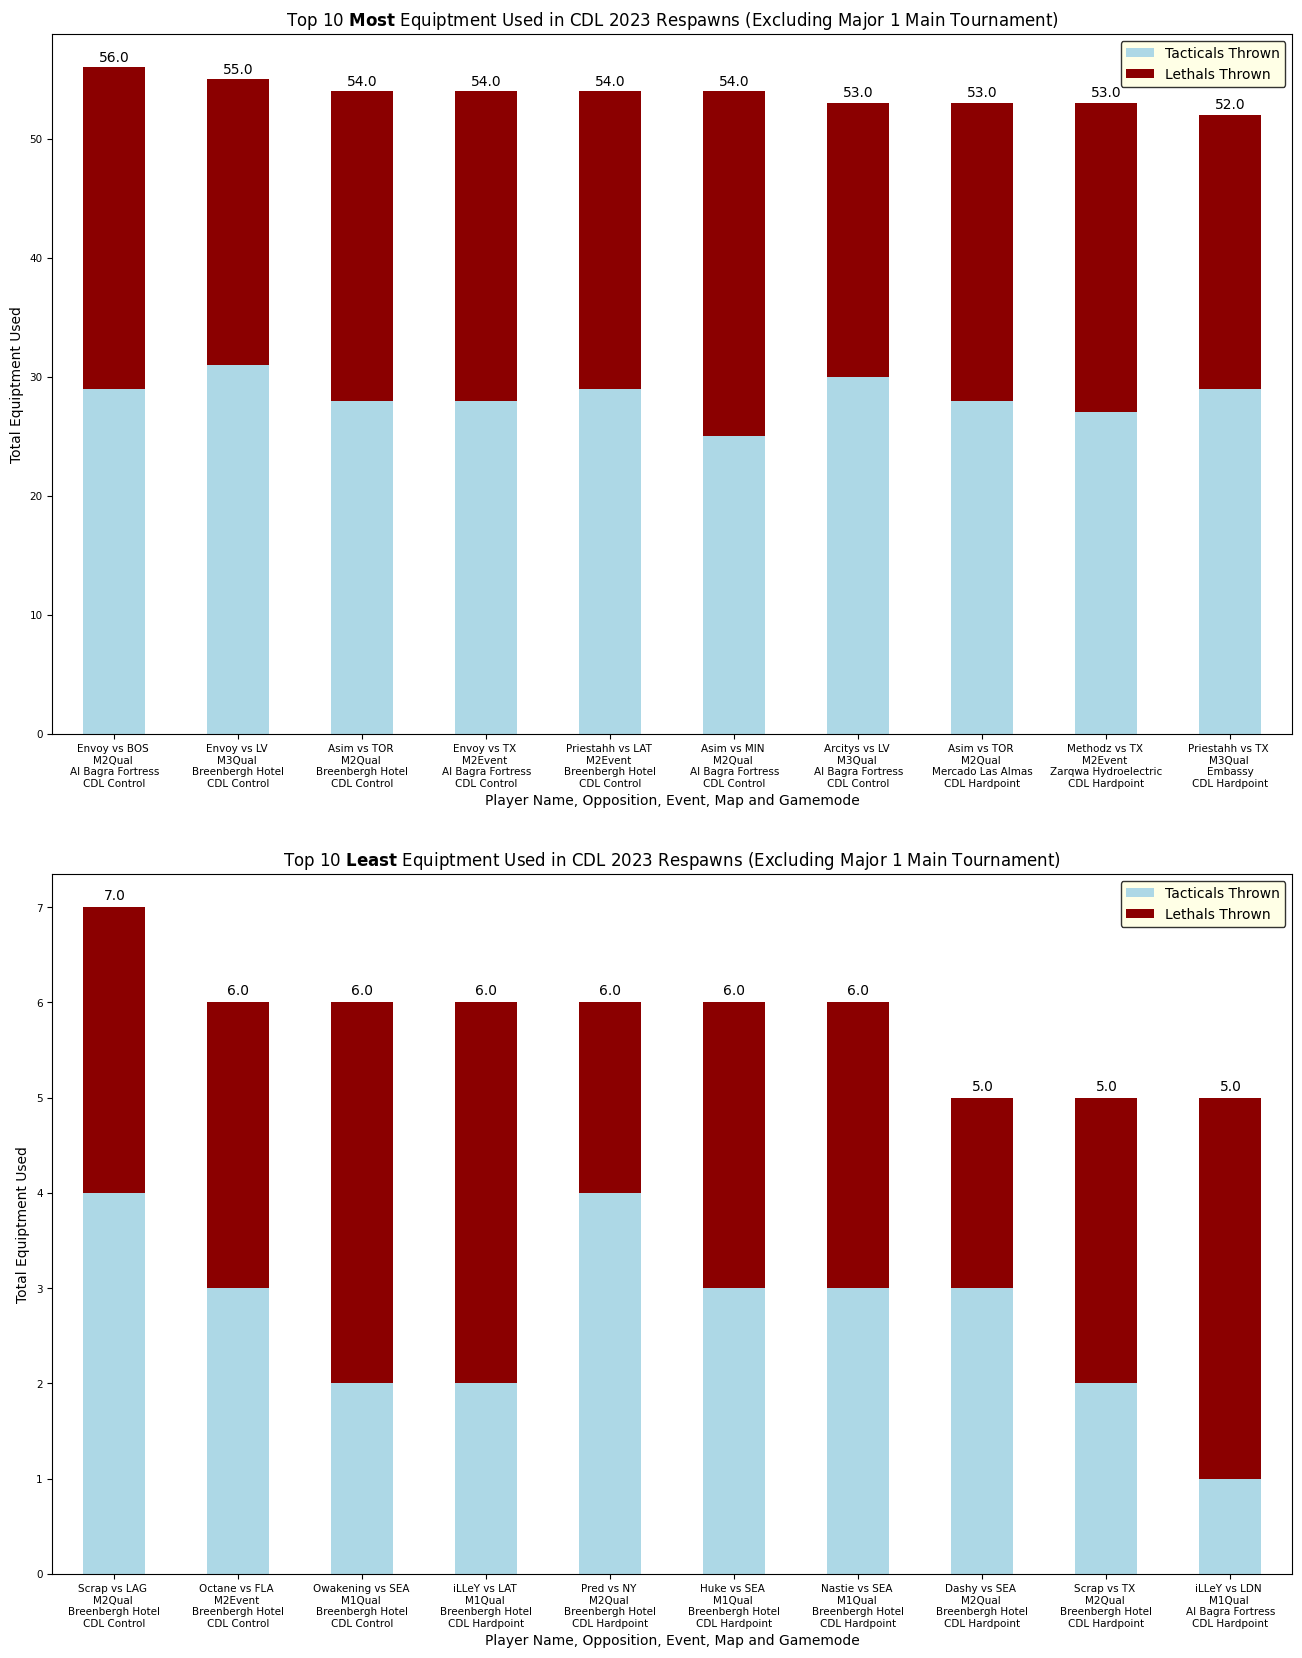

In [ ]:
sorted_df = sorted_df[sorted_df['lethalsUsed'] > 1]
most_used = sorted_df[['fullDescription', 'tacticalsUsed', 'lethalsUsed']].iloc[0:10].set_index('fullDescription')
least_used = sorted_df[['fullDescription', 'tacticalsUsed', 'lethalsUsed']].iloc[-10:].set_index('fullDescription')

most_used.rename(columns={'tacticalsUsed': 'Tacticals Thrown',
                            'lethalsUsed': 'Lethals Thrown'}, inplace=True)

least_used.rename(columns={'tacticalsUsed': 'Tacticals Thrown',
                            'lethalsUsed': 'Lethals Thrown'}, inplace=True)

fig = plt.figure(figsize=(16, 20))
ax1, ax2 = fig.subplots(nrows=2)
most_used.plot(kind='bar', stacked=True, ax=ax1, color=['lightblue', 'darkred'])
least_used.plot(kind='bar', stacked=True, ax=ax2, color=['lightblue', 'darkred'])

my_axes = [ax1, ax2]
for axes in my_axes:
    axes.tick_params(rotation=0, labelsize=7.5)
    axes.set_ylabel("Total Equiptment Used")
    axes.set_xlabel("Player Name, Opposition, Event, Map and Gamemode")
    legend_frame = axes.legend(loc='upper right').get_frame()
    legend_frame.set_facecolor("lightyellow")
    legend_frame.set_edgecolor("black")

for i, used in enumerate(sorted_df["equiptment_used"][0:10]):
    ax1.text(x=ax1.get_xticks()[i], y=used+0.5, s=used, horizontalalignment='center')

for i, used in enumerate(sorted_df["equiptment_used"][-10:]):
    ax2.text(x=ax2.get_xticks()[i], y=used+0.08, s=used, horizontalalignment='center')

ax1.set_title(r"Top 10 $\bfMost$ Equiptment Used in CDL 2023 Respawns (Excluding Major 1 Main Tournament)")
ax2.set_title(r"Top 10 $\bfLeast$ Equiptment Used in CDL 2023 Respawns (Excluding Major 1 Main Tournament)");



I will now summarise all of this into a function so that this can be reproduced at will.

/Users/charliebrowning/parcel-tracker/CDL-Stats/CDL-Stats/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


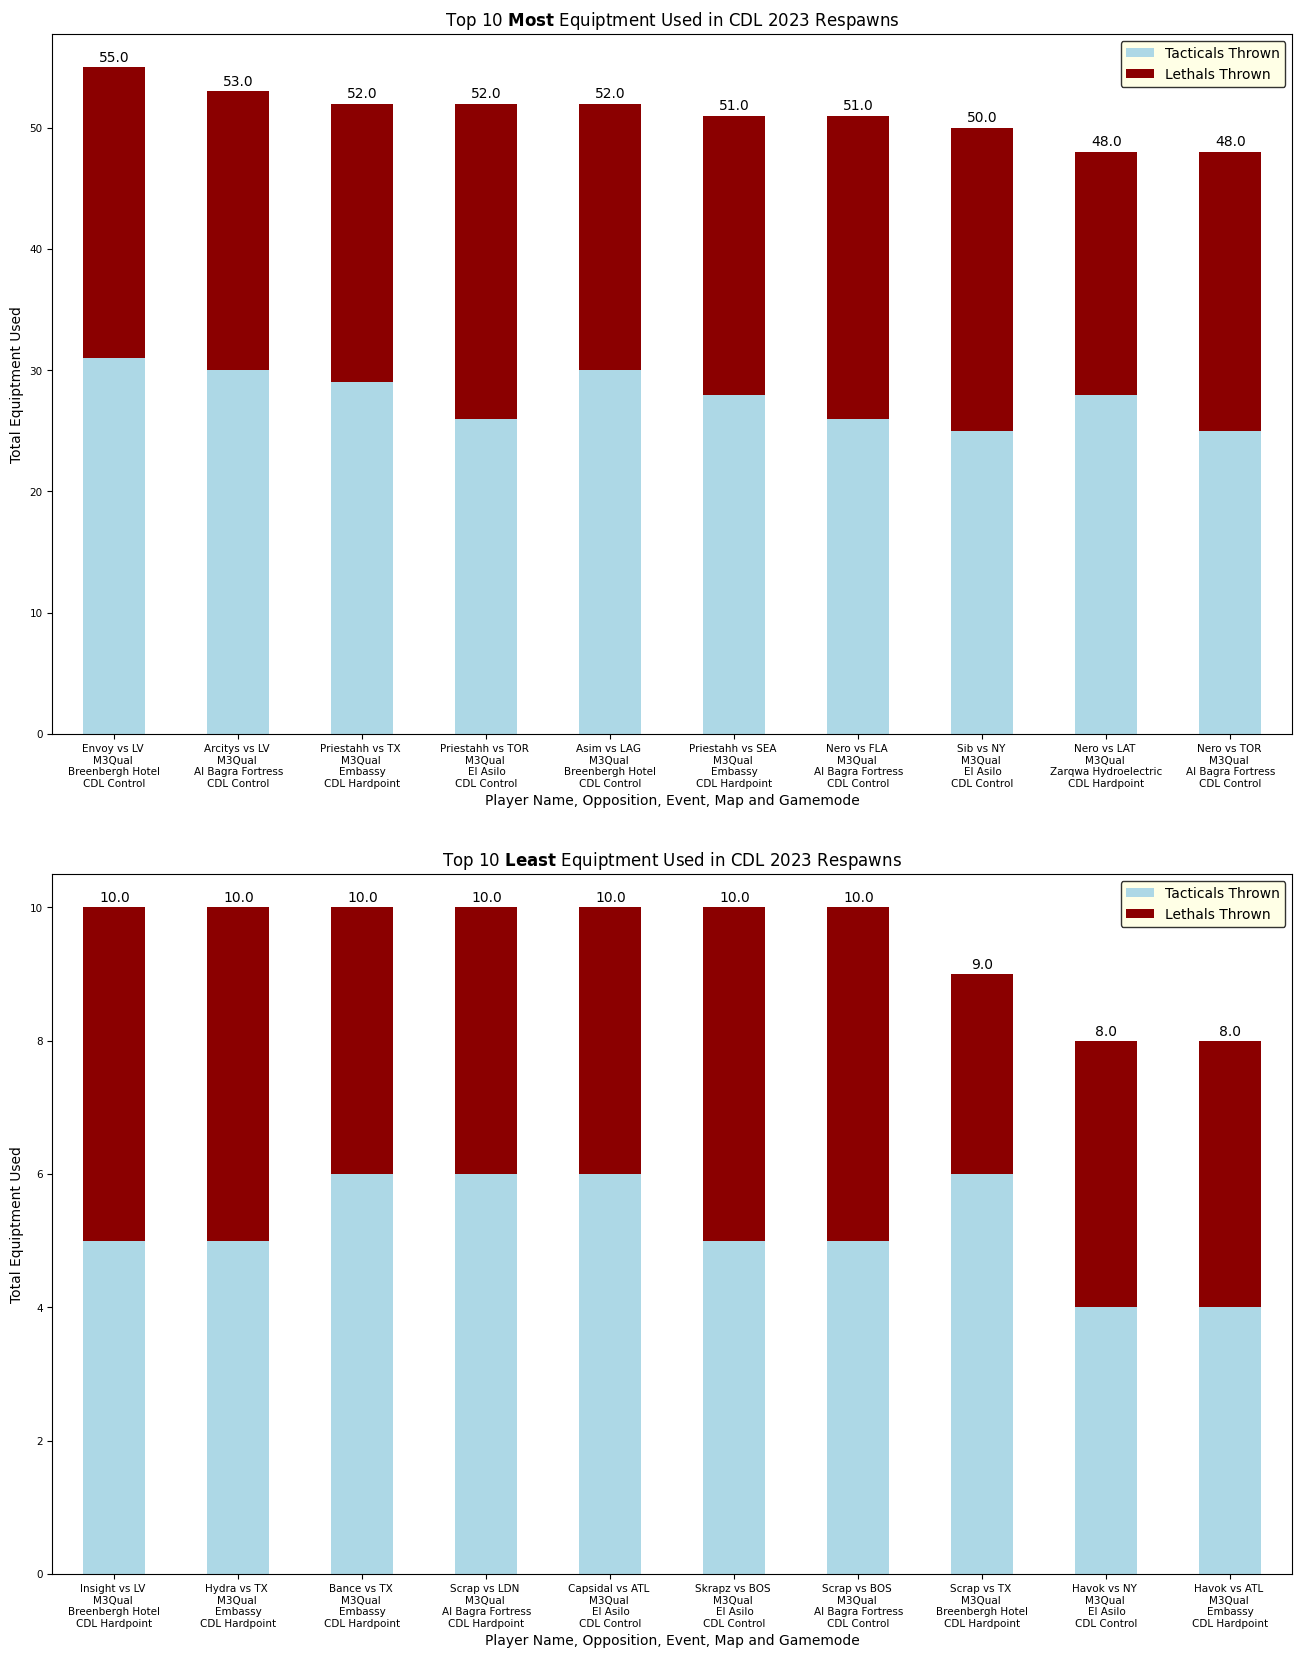

In [ ]:
def top_tactical_usage(df, title_ext=None):
    df['equiptment_used'] = df['tacticalsUsed'] + df['lethalsUsed']
    df = df[df['gameMode'] != 'CDL SnD']
    sorted_df = df.sort_values(by='equiptment_used', ascending=False)

    sorted_df['fullDescription'] = [f"{player} vs {op} \n{ev} \n{map_}\n{mode}" for player, op, map_, mode, ev in zip(sorted_df['alias'], sorted_df['oppo_abbrev'], sorted_df['gameMap'], sorted_df['gameMode'], sorted_df['event'])]

    sorted_df = sorted_df[sorted_df['lethalsUsed'] > 1]
    
    most_used = sorted_df[['fullDescription', 'tacticalsUsed', 'lethalsUsed']].iloc[0:10].set_index('fullDescription')
    least_used = sorted_df[['fullDescription', 'tacticalsUsed', 'lethalsUsed']].iloc[-10:].set_index('fullDescription')

    most_used.rename(columns={'tacticalsUsed': 'Tacticals Thrown',
                                'lethalsUsed': 'Lethals Thrown'}, inplace=True)

    least_used.rename(columns={'tacticalsUsed': 'Tacticals Thrown',
                                'lethalsUsed': 'Lethals Thrown'}, inplace=True)

    fig = plt.figure(figsize=(16, 20))
    ax1, ax2 = fig.subplots(nrows=2)
    most_used.plot(kind='bar', stacked=True, ax=ax1, color=['lightblue', 'darkred'])
    least_used.plot(kind='bar', stacked=True, ax=ax2, color=['lightblue', 'darkred'])

    my_axes = [ax1, ax2]
    for axes in my_axes:
        axes.tick_params(rotation=0, labelsize=7.5)
        axes.set_ylabel("Total Equiptment Used")
        axes.set_xlabel("Player Name, Opposition, Event, Map and Gamemode")
        legend_frame = axes.legend(loc='upper right').get_frame()
        legend_frame.set_facecolor("lightyellow")
        legend_frame.set_edgecolor("black")

    for i, used in enumerate(sorted_df["equiptment_used"][0:10]):
        ax1.text(x=ax1.get_xticks()[i], y=used+0.5, s=used, horizontalalignment='center')

    for i, used in enumerate(sorted_df["equiptment_used"][-10:]):
        ax2.text(x=ax2.get_xticks()[i], y=used+0.08, s=used, horizontalalignment='center')

    ax1.set_title(fr"Top 10 $\bfMost$ Equiptment Used in CDL 2023 Respawns {title_ext if title_ext else ''}")
    ax2.set_title(fr"Top 10 $\bfLeast$ Equiptment Used in CDL 2023 Respawns {title_ext if title_ext else ''}")
    return fig


result = top_tactical_usage(df[df['event']=='M3Qual'])
    